# **Ventas de un supermercado**

El crecimiento de los supermercados en las ciudades más pobladas está aumentando y la competencia en el mercado también es alta. El conjunto de datos es una de las ventas históricas de una empresa de supermercados que ha registrado datos en 3 sucursales diferentes durante 3 meses. Los métodos de análisis de datos predictivos son fáciles de aplicar con este conjunto de datos.

Aspectos relevantes: Variables
- Invoice ID (ID de factura): número de identificación de factura del comprobante de venta generado por computadora.
- Branch	(Sucursal): Sucursal del supercentro (se encuentran disponibles 3 sucursales identificadas por A, B y C).
- City (Ciudad)
- Customer type	(Tipo de cliente): Tipo de clientes, registrado por Socios para clientes con tarjeta de socio y Normal para sin tarjeta de socio.
- Gender	(Género): Tipo de género del cliente.
- Product line (Línea de productos): Grupos generales de categorización de artículos: accesorios electrónicos, accesorios de moda, alimentos y bebidas, salud y belleza, hogar y estilo de vida, deportes y viajes.
- Precio unitario: Precio de cada producto en $.
- Cantidad: Número de productos adquiridos por el cliente.
- Impuesto: 5% de impuesto para la compra del cliente.
- Total: Precio total con impuestos incluidos.
- Fecha: Fecha de compra (Registro disponible desde enero de 2019 a marzo de 2019).
- Hora: Hora de compra (de 10 a 21 horas).
- Pago: Pago utilizado por el cliente para la compra (hay 3 métodos disponibles: efectivo, tarjeta de crédito y billetera electrónica).
- COGS: Costo de los bienes vendidos.
- Porcentaje de margen bruto: Porcentaje de margen bruto.
- Ingresos brutos: Ingresos brutos.
- Calificación: Calificación de estratificación del cliente sobre su experiencia de compra general (en una escala del 1 al 10).

1. Carga de data

In [ ]:
#Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
#Cargar la data
data=pd.read_csv("/content/supermarket_sales.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Verificando columnas
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#Estadísticos del conjunto de datos
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
#Ventas Totales por Sucursal y Línea de Producto
tabla_cruzada1=pd.pivot_table(data, values='Total', index='Branch', columns='Product line', aggfunc='sum')
tabla_cruzada1

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,18317.1135,16332.5085,17163.1005,12597.753,22417.1955,19372.6995
B,17051.4435,16413.3165,15214.8885,19980.660,17549.1645,19988.1990
C,18968.9745,21560.0700,23766.8550,16615.326,13895.5530,15761.9280


In [ ]:
#Cantidad Total de Productos Vendidos por Método de Pago y Tipo de Cliente
tabla_cruzada2=pd.pivot_table(data, values='Quantity', index='Payment', columns='Customer type', aggfunc='sum')
tabla_cruzada2

Customer type,Member,Normal
Payment,,
Cash,885,1011
Credit card,1002,720
Ewallet,898,994


In [ ]:
#Número Total de Ventas por Línea de Producto
#Para entender qué líneas de producto son las más populares, agrupamos por 'Product line'.
Ventas_Totales_por_Línea_de_Producto = data.groupby('Product line')['Total'].sum()
Ventas_Totales_por_Línea_de_Producto

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

In [ ]:
#Promedio de Precio Unitario y Cantidad Vendida por Tipo de Cliente
#Agrupando por 'Customer type', podemos entender las diferencias en el comportamiento de compra entre miembros y clientes normales.
Prom_pu_y_Cant_Vendida_por_TipCliente = data.groupby('Customer type').agg({
    'Unit price': 'mean',
    'Quantity': 'mean'
})
Prom_pu_y_Cant_Vendida_por_TipCliente

,Unit price,Quantity
Customer type,,
Member,56.206986,5.558882
Normal,55.135130,5.460922


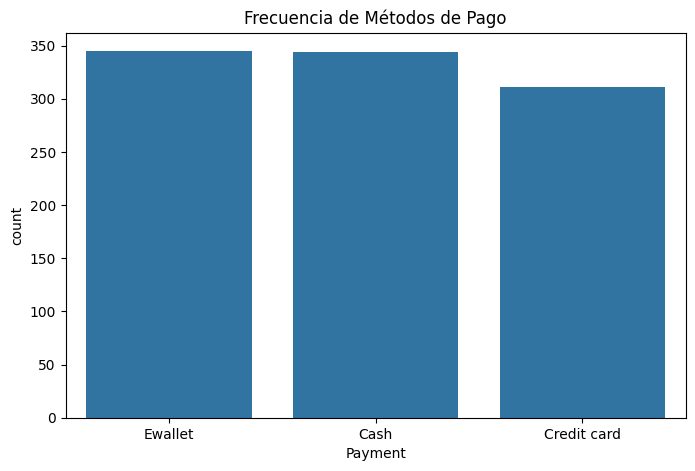

In [ ]:
#Ventas y métodos de pago
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment', data=data)
plt.title('Frecuencia de Métodos de Pago')
plt.show()

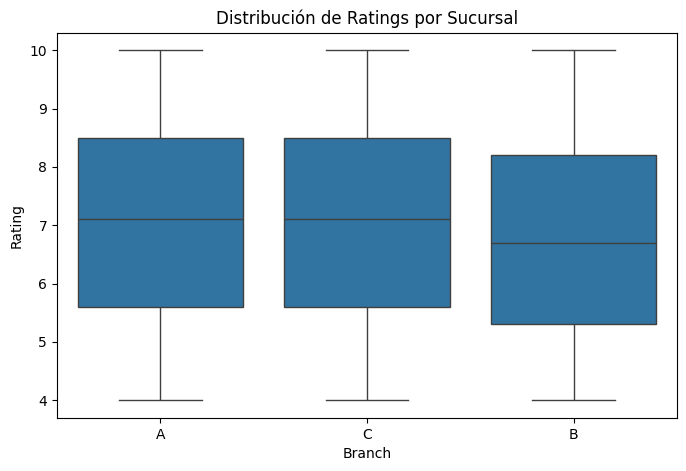

In [ ]:
#El rating puede darnos una idea de la satisfacción del cliente:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Branch', y='Rating', data=data)
plt.title('Distribución de Ratings por Sucursal')
plt.show()

In [ ]:
Perfil de clientes:
1. ¿Cuál es el tipo de cliente más común en el supermercado (Socio o Normal)?

In [1]:
import pandas as pd
df = pd.read_csv('supermarket_sales.csv', delimiter=';')
print(df.head())
tipo_cliente_count = df['Customer type'].value_counts()
print(tipo_cliente_count)
tipo_cliente_comun = tipo_cliente_count.idxmax()
print("El tipo de cliente más común es:", tipo_cliente_comun)


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715  1/05/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200  3/08/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255  3/03/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785  2/08/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10: